In [2]:
%pylab inline
import numpy as np
import nibabel as nib
from scipy.stats import pearsonr
from sklearn.decomposition import FastICA

Populating the interactive namespace from numpy and matplotlib


C:\Users\Lixuan\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
atlas_string = 'OneDrive_1_11-16-2018/Atlas/Rat_Paxinos_400um_bilat_180823_atlas.nii.gz'

In [4]:
def datafunction(img, atlas):

    img_ = nib.load(img)
    atlas_ = nib.load(atlas)
    
    #transfers data to matrix
    img_data = np.asarray(img_._dataobj)
    atlas_data = np.asarray(atlas_._dataobj)
    
    #Region refers to region number in ITK
    region_mask = (atlas_data == 27) #extracts region data
    region_indices = np.nonzero(region_mask)
    
    return img_data[region_indices].mean(axis = 0)

In [5]:
time_course_data1 = datafunction('OneDrive_1_11-16-2018/Data/sub-F01_task-rs_bold.nii.gz', atlas_string)
print('data 1')
time_course_data2 = datafunction('OneDrive_1_11-16-2018/Data/sub-F02_task-rs_bold.nii.gz', atlas_string)
print('data 2')
time_course_data3 = datafunction('OneDrive_1_11-16-2018/Data/sub-F03_task-rs_bold.nii.gz', atlas_string)
print('data 3')
time_course_data4 = datafunction('OneDrive_1_11-16-2018/Data/sub-F04_task-rs_bold.nii.gz', atlas_string)
print('data 4')
time_course_data5 = datafunction('OneDrive_1_11-16-2018/Data/sub-F05_task-rs_bold.nii.gz', atlas_string)
print('data 5')
time_course_data6 = datafunction('OneDrive_1_11-16-2018/Data/sub-F06_task-rs_bold.nii.gz', atlas_string)
print('data 6')
time_course_data7 = datafunction('OneDrive_1_11-16-2018/Data/sub-F07_task-rs_bold.nii.gz', atlas_string)
print('data 7')
time_course_data8 = datafunction('OneDrive_1_11-16-2018/Data/sub-F08_task-rs_bold.nii.gz', atlas_string)
print('data 8')
time_course_data9 = datafunction('OneDrive_1_11-16-2018/Data/sub-F09_task-rs_bold.nii.gz', atlas_string)
print('data 9')
time_course_data10 = datafunction('OneDrive_1_11-16-2018/Data/sub-F10_task-rs_bold.nii.gz', atlas_string)
print('data 10')


data 1
data 2
data 3
data 4
data 5
data 6
data 7
data 8
data 9
data 10


In [6]:
time_course_data1.shape

(900,)

In [12]:
concatenated = np.concatenate((time_course_data1, time_course_data2, time_course_data3, time_course_data4, time_course_data5, time_course_data6,
              time_course_data7, time_course_data8, time_course_data9, time_course_data10), axis = 0)

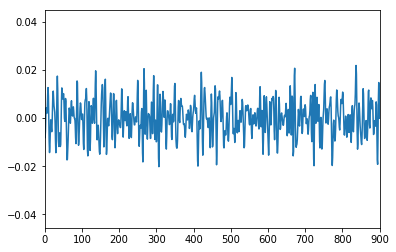

In [15]:
xlim(0, 900)
plot(concatenated)


In [105]:
ica = FastICA(5)

In [107]:
X = np.transpose(img_data[region_indices])
icomps = ica.fit_transform(X)

C:\Users\Lixuan\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


In [109]:
output = []
for i, c in enumerate(icomps.T):
    output.append(np.zeros(X.shape[1]))
    for v in range (X.shape[1]):
        output[i][v] = pearsonr(c, X[:, v])[0]
    
output_volume = np.zeros(atlas_data.shape)
for i, (x, y, z) in enumerate(np.transpose(region_indices)):
    output_volume[x, y, z] = output[0][i]

In [113]:
output_volume.shape

(72, 72, 32)

In [117]:
#Saves to file
nii = nib.Nifti1Image(output_volume, atlas.affine)
nii.to_filename('final_comp.nii.gz')
print('Output saved to ' + 'final_comp.nii.gz')

Output saved to final_comp.nii.gz
